In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [3]:
molecule_dataset = pd.read_csv(
    DATA / "EGFR_compounds_lipinski.csv",
    usecols=["molecule_chembl_id", "smiles", "pIC50"],
)
print(f"Number of molecules in dataset: {len(molecule_dataset)}")
molecule_dataset.head(5)

Number of molecules in dataset: 5431


,molecule_chembl_id,smiles,pIC50
0,CHEMBL63786,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL35820,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
2,CHEMBL53711,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
3,CHEMBL53753,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910
4,CHEMBL66031,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910


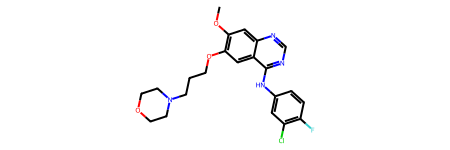

In [4]:
#### Query: For the query molecule Gefitinib, generate the ROMol object from the query molecule’s SMILES.
'''
Gefitinib is a medication used for certain breast, lung and other cancers. 
Gefitinib is an EGFR inhibitor, like erlotinib, which interrupts signaling through 
the epidermal growth factor receptor (EGFR) in target cells.
'''

query = Chem.MolFromSmiles("COC1=C(OCCCN2CCOCC2)C=C2C(NC3=CC(Cl)=C(F)C=C3)=NC=NC2=C1")
query

In [5]:
#### Generate MACCS and Morgan fingerprints for the query molecule.
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
maccs_fp_query = MACCSkeys.GenMACCSKeys(query)
circular_fp_query = fpg.GetCountFingerprint(query)

In [6]:
PandasTools.AddMoleculeColumnToFrame(molecule_dataset, "smiles")
circular_fp_list = molecule_dataset["ROMol"].apply(fpg.GetCountFingerprint).tolist()
maccs_fp_list = molecule_dataset["ROMol"].apply(MACCSkeys.GenMACCSKeys).tolist()

In [7]:
#### Calculate the Tanimoto similarity between the query molecule (Gefitinib) and all molecules our dataset (using MACCS and Morgan fingerprints).

molecule_dataset["tanimoto_maccs"] = DataStructs.BulkTanimotoSimilarity(maccs_fp_query, maccs_fp_list)
molecule_dataset["tanimoto_morgan"] = DataStructs.BulkTanimotoSimilarity(circular_fp_query, circular_fp_list)

In [8]:
#### Calculate Dice similarity for query molecule (Gefitinib) and all molecules in file (MACCS, Morgan).

molecule_dataset["dice_maccs"] = DataStructs.BulkDiceSimilarity(maccs_fp_query, maccs_fp_list)
molecule_dataset["dice_morgan"] = DataStructs.BulkDiceSimilarity(circular_fp_query, circular_fp_list)

In [9]:
molecule_dataset[
    ["smiles", "tanimoto_maccs", "tanimoto_morgan", "dice_maccs", "dice_morgan"]
].head(5)

,smiles,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
0,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,0.409836,0.324786,0.581395,0.490323
1,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,0.666667,0.445455,0.800000,0.616352
2,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,0.484375,0.327434,0.652632,0.493333
3,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,0.428571,0.333333,0.600000,0.500000
4,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,0.384615,0.345133,0.555556,0.513158


In [10]:
PandasTools.AddMoleculeColumnToFrame(molecule_dataset, smilesCol="smiles")
PandasTools.RenderImagesInAllDataFrames(True)
# Show first 2 moleculemolecule_dataset.head(2)

,molecule_chembl_id,smiles,pIC50,ROMol,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
0,CHEMBL63786,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,,0.409836,0.324786,0.581395,0.490323
1,CHEMBL35820,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,,0.666667,0.445455,0.800000,0.616352
2,CHEMBL53711,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,,0.484375,0.327434,0.652632,0.493333

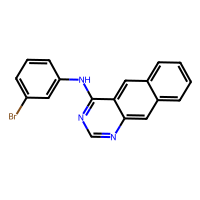
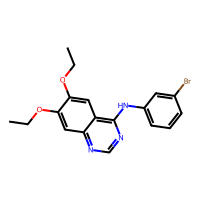
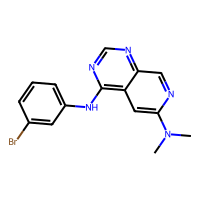

In [11]:
# Show all columns
molecule_dataset.head(3)

,molecule_chembl_id,smiles,pIC50,ROMol,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
3252,CHEMBL939,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,6.288193,,1.000000,1.000000,1.000000,1.000000
1118,CHEMBL14699,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCOCC1,8.000000,,1.000000,0.923913,1.000000,0.960452
273,CHEMBL4448162,COc1cc2ncnc(Nc3ccc(Cl)c(Cl)c3)c2cc1OCCCN1CCOCC1,9.000000,,0.983333,0.875000,0.991597,0.933333

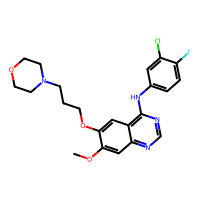
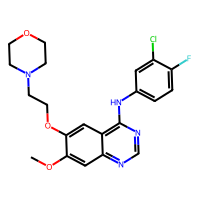
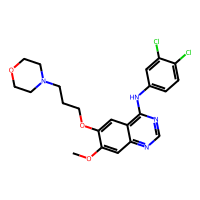

In [12]:
PandasTools.RenderImagesInAllDataFrames(True)
molecule_dataset.sort_values(["tanimoto_morgan"], ascending=False).head(3)

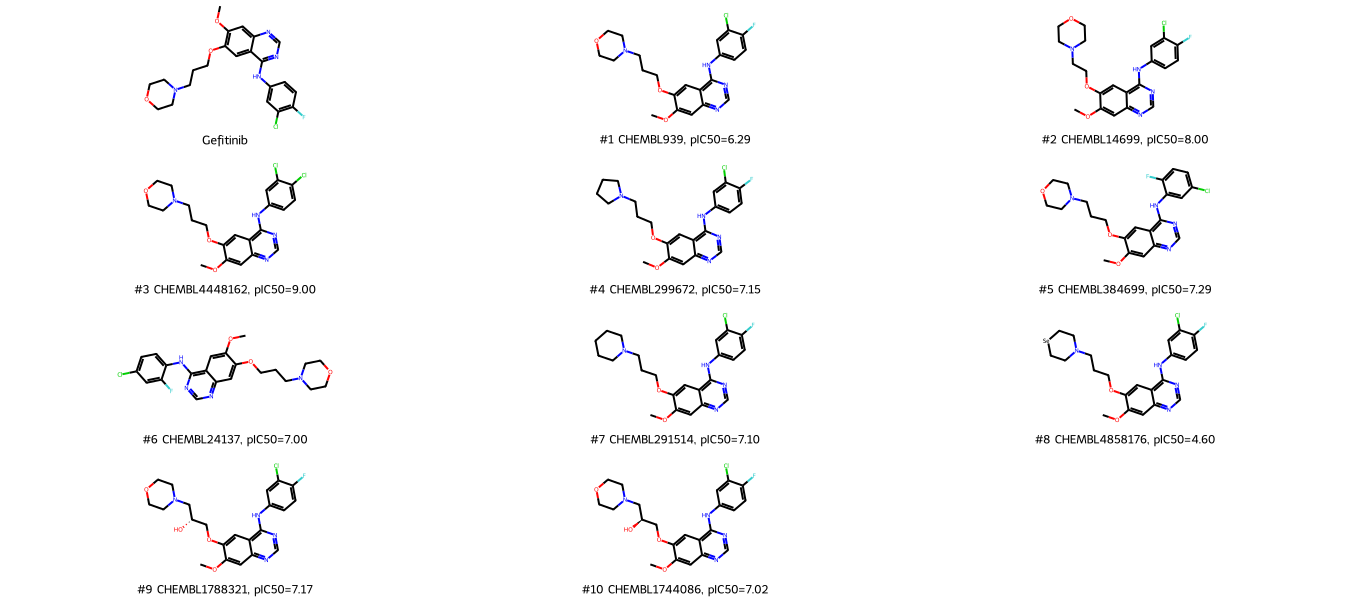

In [13]:
#### Show the query and its most similar molecules alongside the molecules’ bioactivities.

top_n_molecules = 10
top_molecules = molecule_dataset.sort_values(["tanimoto_morgan"], ascending=False).reset_index()
top_molecules = top_molecules[:top_n_molecules]
legends = [
    f"#{index+1} {molecule['molecule_chembl_id']}, pIC50={molecule['pIC50']:.2f}"
    for index, molecule in top_molecules.iterrows()
]
Chem.Draw.MolsToGridImage(
    mols=[query] + top_molecules["ROMol"].tolist(),
    legends=(["Gefitinib"] + legends),
    molsPerRow=3,
    subImgSize=(450, 150),
)